# Part 1: Numerical Integration — Continued

Last week, you implemented a simple Riemann sum to compute the area under a curve. This week, we explore more accurate numerical integration methods.

## Question 1: Trapezoidal Rule
1. Compute the area under the given curve using the trapezoidal rule on a **uniform grid**.
2. Uniform grids use the same step size everywhere, even in regions where the function varies rapidly.  
   Modify your approach to use an **adaptive grid**, with smaller steps in regions where the function changes more, and compare the results. Think about how you would detect regions where the function changes more rapidly than others.

## Question 2: Simpson’s Rule
1. Compute the area under the given curve using Simpson’s rule with 5 increasingly finer subdivisions.
2. Plot the resulting approximations in different plots to observe their convergence.



In [ ]:
import numpy as np

# -----------------------------
# Original discrete data
# -----------------------------
x = np.linspace(0, 5, 15)
y = np.sin(x) + 0.3*np.sin(5*x) + 1.2

# Define the underlying function (used to simulate extra samples for adaptive grid)
def f(x):
    return np.sin(x) + 0.3*np.sin(5*x) + 1.2


# -----------------------------
# 1. Uniform grid trapezoidal rule
# -----------------------------
h = x[1] - x[0]

area_uniform = h * (0.5*y[0] + np.sum(y[1:-1]) + 0.5*y[-1])

print("Uniform grid trapezoidal area:", area_uniform)
print("Number of uniform grid points:", len(x))


# -----------------------------
# 2. Adaptive grid construction
# -----------------------------

# Measure how rapidly the function changes between points
dy = np.abs(np.diff(y))
threshold = np.mean(dy)   # simple criterion for "rapid change"

x_adapt = [x[0]]

for i in range(len(x) - 1):
    # If the function changes rapidly in this interval, refine it
    if abs(y[i+1] - y[i]) > threshold:
        # Subdivide this interval into smaller pieces
        xs = np.linspace(x[i], x[i+1], 5)[1:]   # add 4 extra interior points
        x_adapt.extend(xs.tolist())
    else:
        # Keep the original endpoint
        x_adapt.append(x[i+1])

x_adapt = np.array(x_adapt)
y_adapt = f(x_adapt)


# -----------------------------
# Adaptive trapezoidal rule (non-uniform grid)
# -----------------------------
area_adaptive = np.sum(
    0.5 * (x_adapt[1:] - x_adapt[:-1]) * (y_adapt[1:] + y_adapt[:-1])
)

print("\nAdaptive grid trapezoidal area:", area_adaptive)
print("Number of adaptive grid points:", len(x_adapt))


# -----------------------------
# High-resolution reference solution (for error comparison)
# -----------------------------
x_ref = np.linspace(0, 5, 5000)
y_ref = f(x_ref)
area_ref = np.trapezoid(y_ref, x_ref)

print("\nReference (high-resolution) area:", area_ref)

print("\nErrors:")
print("Uniform grid error: ", abs(area_uniform - area_ref))
print("Adaptive grid error:", abs(area_adaptive - area_ref))


Uniform grid trapezoidal area: 6.7090869443831105
Number of uniform grid points: 15

Adaptive grid trapezoidal area: 6.7022620386604626
Number of adaptive grid points: 33

Reference (high-resolution) area: 6.716865585006172

Errors:
Uniform grid error:  0.007778640623061328
Adaptive grid error: 0.014603546345709262


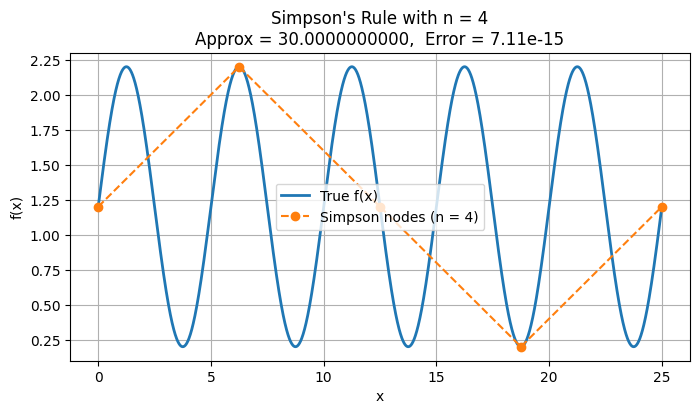

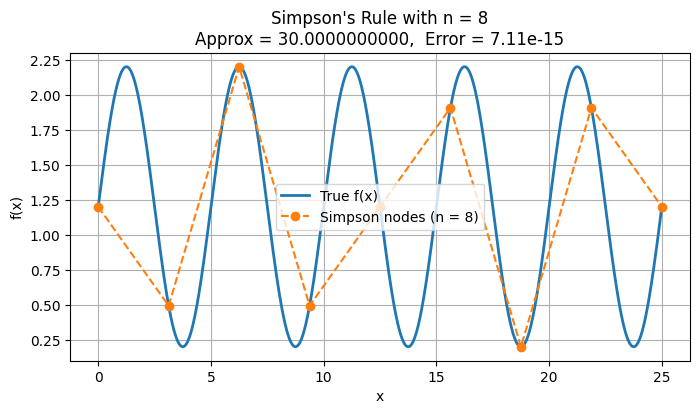

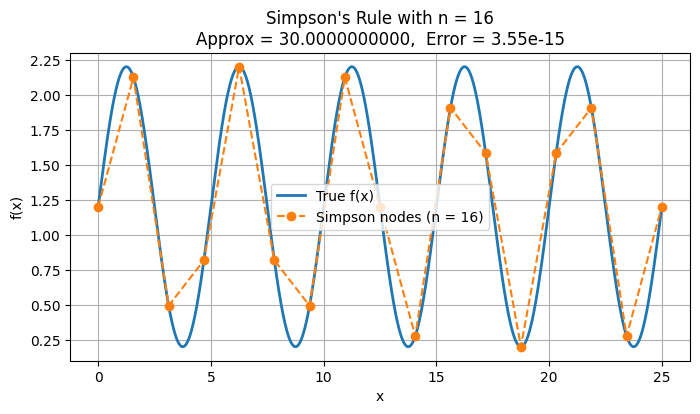

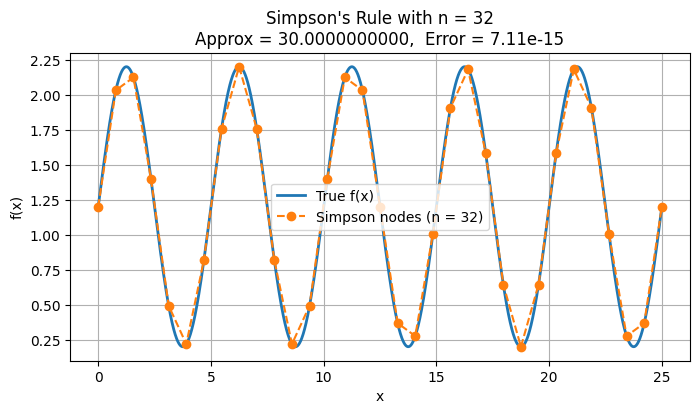

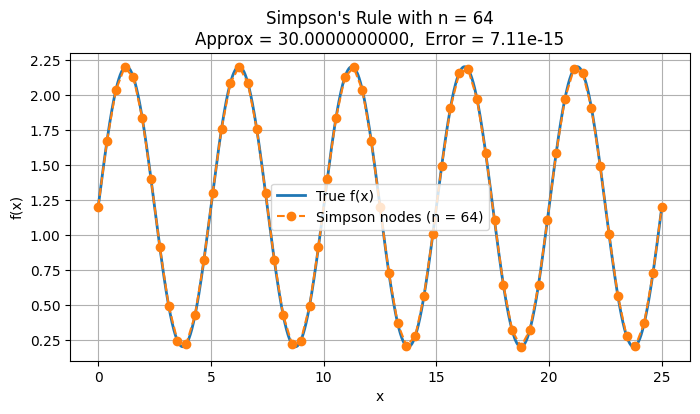

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to integrate
f = lambda x: np.sin(2 * np.pi * x / 5) + 1.2
a, b = 0, 25

# Exact value
exact = 1.2 * (b - a)

# Simpson's rule
def simpsons_rule(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's rule")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)

    S = y[0] + y[-1] \
        + 4 * np.sum(y[1:-1:2]) \
        + 2 * np.sum(y[2:-2:2])

    return h / 3 * S, x, y

# Subdivisions (even only)
n_values = [4, 8, 16, 32, 64]

# Fine grid for true curve
x_fine = np.linspace(a, b, 2000)
y_fine = f(x_fine)

for n in n_values:
    approx, x_nodes, y_nodes = simpsons_rule(f, a, b, n)
    error = abs(approx - exact)

    plt.figure(figsize=(8, 4))
    
    # True function
    plt.plot(x_fine, y_fine, linewidth=2, label="True f(x)")
    
    # Simpson sampling points
    plt.plot(x_nodes, y_nodes, 'o--', label=f"Simpson nodes (n = {n})")

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(f"Simpson's Rule with n = {n}\nApprox = {approx:.10f},  Error = {error:.2e}")
    plt.legend()
    plt.grid(True)
    plt.show()


# Part 2: Root Finding
1. Solve the equation $z^4 -1 = 0$ using Newton's method. Think carefully about what Newton’s method does and does not guarantee. Consider what determines which root is found, and what this implies if your goal is to identify all roots of the equation.
2. Based on your observations from the previous step, what conclusions can you draw? Use a Newton basin plot to show which root Newton’s method converges to for different initial guesses in the complex plane.


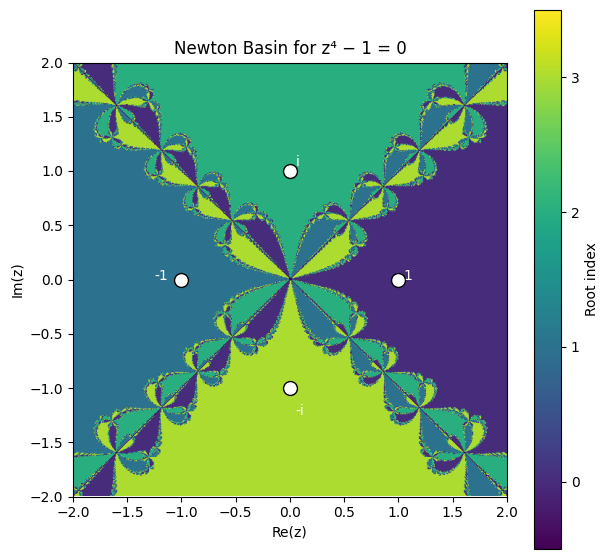

Exact roots of z^4 - 1 = 0:
(1+0j)
(-1+0j)
1j
(-0-1j)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define function and derivative
f  = lambda z: z**4 - 1
df = lambda z: 4*z**3

# Exact roots of z^4 = 1
roots = np.array([1, -1, 1j, -1j])

# Newton's method iteration
def newton(z0, max_iter=50, tol=1e-8):
    z = z0
    for _ in range(max_iter):
        if abs(df(z)) < 1e-12:
            return None
        z = z - f(z) / df(z)
        if abs(f(z)) < tol:
            return z
    return None

# Grid in complex plane
N = 600
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(x, y)
Z0 = X + 1j * Y

# Array to store which root each point converges to
basin = np.zeros(Z0.shape, dtype=int)

# Assign a color index based on closest root
for i in range(N):
    for j in range(N):
        z_final = newton(Z0[i, j])
        if z_final is None:
            basin[i, j] = -1
        else:
            # Find nearest exact root
            distances = np.abs(z_final - roots)
            basin[i, j] = np.argmin(distances)

# -----------------------------
# Plot Newton Basin
# -----------------------------
plt.figure(figsize=(7, 7))
plt.imshow(basin, extent=[-2, 2, -2, 2], origin='lower')
plt.colorbar(ticks=[0, 1, 2, 3], label="Root index")
plt.clim(-0.5, 3.5)

plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title("Newton Basin for z⁴ − 1 = 0")

# Mark exact roots
plt.scatter([1, -1, 0, 0], [0, 0, 1, -1], color='white', s=100, edgecolors='black')
plt.text(1.05, 0, "1", color='white')
plt.text(-1.25, 0, "-1", color='white')
plt.text(0.05, 1.05, "i", color='white')
plt.text(0.05, -1.25, "-i", color='white')

plt.show()

# -----------------------------
# Print exact roots
# -----------------------------
print("Exact roots of z^4 - 1 = 0:")
for r in roots:
    print(r)


## Note 1: Newton Basins

When we use **Newton’s method** to solve an equation  $f(z) = 0,$ 
we start from an initial guess $z_0$ and generate a sequence via:
$
z_{n+1} = z_n - \frac{f(z_n)}{f'(z_n)},
$

hoping it converges to a root. In the complex plane, **which root Newton’s method converges to depends strongly on the starting point**.


A **Newton basin** (or *basin of attraction*) for a given root is the set of all initial guesses \(z_0\) that eventually converge to that root under Newton iteration.  

#### Axes and Plotting

- **x-axis**: real part of the initial guess, \(\text{Re}(z_0)\)  
- **y-axis**: imaginary part of the initial guess, \(\text{Im}(z_0)\)  
- Each point \((x_0, y_0)\) in this plane is a possible initial guess for Newton’s method.
- **Coloring condition**: assign a color to the point based on **which root the iteration converges to**.  
The resulting 2D plot divides the complex plane into regions (basins) of points that converge to the same root. Boundaries between basins can be highly intricate — even fractal.

#### Example Images

<img src="https://upload.wikimedia.org/wikipedia/commons/d/db/Julia_set_for_the_rational_function.png" width="250">
<img src="https://blogs.mathworks.com/community/files/newtons04.png" width="250">

*These figures show the basins of attraction for different polynomials.*

## Note 2: Prompt Engineering Best Practices

Remember that AI-generated code is **not guaranteed to be correct**, even if it looks plausible or produces runnable output. Models can generate convincing but incorrect solutions (“hallucinations”), and this risk increases as our tasks become more complex or involve multiple constraints.

You are expected to:
- Formulate prompts clearly and precisely. This requires that you understand the problem yourself and have an algorithm or strategy in mind.
- Verify that both the **algorithm** and the **output** match your mathematical or physical expectations.

Here are some guides on **prompt engineering for coding**:  
1. https://help.openai.com/en/articles/6654000-best-practices-for-prompt-engineering-with-the-openai-api
2. https://www.digitalocean.com/resources/articles/prompt-engineering-best-practices



## Submission Instructions

1. Each question must use **one cell**, with all corresponding outputs displayed directly below it.
2. Before submission, make sure **all outputs are visible** (re-run your code one last time). Submit the notebook as a `.ipynb` file on Quercus. 
3. Grading is based on completion. Completion means that **all questions (in Part 1 and 2) have visible outputs**.